# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #2

### Дедлайн: 14 декабря 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух задач, каждая из которых оценивается в 5 баллов. Все пункты в пределах одной задачи имеют одинаковый вес.

2. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.

3. Весь код должен быть написан на Python, R, C или C++.

4. Решения принимаются до **14 декабря 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

5. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/HTd0GCXS).

6. Репозиторий должен содержать файл(ы) с кодом и текстовыми пояснениями к решению задач. При этом:

* Если вы пишете код в тетрадке .ipynb, то пояснения и выводы можно указывать в ячейках Markdown, и в репозиторий достаточно загрузить один файл, названный по типу «name\_surname\_group\_hw2.ipynb».

* Если вы пишете код в отдельных текстовых файлах, то пояснения и выводы нужно вынести в отчёт, который можно написать в любимом текстовом редакторе и экспортировать в pdf. В репозиторий нужно загрузить все файлы с кодом (если их несколько, то в README.md требуется подробно указать, что содержит каждый файл), названные по типу «name\_surname\_group\_hw2\_filename.ext», где вместо ext может быть .py, .R, .c, .cpp, а также отчёт, названный по типу «name\_surname\_group\_hw2\_report.pdf». 

7. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

8. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

**Disclaimer:** для проверки гипотез используйте ваш любимый уровень значимости!

**Hint:** в statsmodels есть всё-всё-всё! 

---

## Задача 1: "Cloudy, with a chance of..." (5 баллов).

В этой задаче нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. Формат задачи свободный: оцениваются любые разумные действия. В качестве зависимой переменной возьмём температуру воздуха (`temperature`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, регрессия может быть не значимой в целом), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные.

**Предобработка данных**. Загрузите данные и проведите любую предобработку, которую считаете нужной. Поясните свои действия.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # Модели
import statsmodels.stats.api as sms # Тесты

import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv(r'C:\\Users\\zolotarev\\Downloads\\archive\\weatherHistory.csv')
y = data['Temperature (C)']
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


**Построение объясняющей модели.**

**Пункт 1.** Выберите независимые переменные, которые будут включены в объясняющую модель. Поясните, почему выбор этих переменных разумен (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации).

**Ответ:** Сперва возьмём в качестве независимых переменных почти все, имеющиеся в датасете, за исключением очевидных подсказок (ощущаемая температура) и оставим по одному показателю среди пар почти линейно коррелирующих между собой столбцов (Summary & Daily Summary). Дальнейшие переменные будем убирать по очереди по мере разведочного анализа. 

* Будем брать ощущение температуры за вчерашний день в тот же самый час, поскольку мне всё-таки кажется, что информация о предыдущих температурах должна иметься в реальной задаче, тогда как информация о фактической и ощущаемой температуре прямо сейчас не имеет права быть использованной
* Общее состояние погоды может дать некоторую общую информацию касательно возможных отклонений температуры при прочих равных
* Осадки дают возможность уточнить время года
* Остальные признаки содержат числовые данные и по идее дадут возможность более точно предсказывать погоду в зависимости от каких-то физических особенностей показателя

In [143]:
data['previous_apparent_t'] = data['Apparent Temperature (C)'].shift(24)

In [167]:
columns = ['previous_apparent_t', 'Summary', 'Precip Type', 'Humidity', 'Wind Speed (km/h)', 
          'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']
X = data[columns]
X

,previous_apparent_t,Summary,Precip Type,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,NaN,Partly Cloudy,rain,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,NaN,Partly Cloudy,rain,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,NaN,Mostly Cloudy,rain,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,NaN,Partly Cloudy,rain,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,NaN,Mostly Cloudy,rain,0.83,11.0446,259.0,15.8263,0.0,1016.51
...,...,...,...,...,...,...,...,...,...
96448,24.905556,Partly Cloudy,rain,0.43,10.9963,31.0,16.1000,0.0,1014.36
96449,22.366667,Partly Cloudy,rain,0.48,10.0947,20.0,15.5526,0.0,1015.16
96450,21.016667,Partly Cloudy,rain,0.56,8.9838,30.0,16.1000,0.0,1015.66
96451,19.927778,Partly Cloudy,rain,0.60,10.5294,20.0,16.1000,0.0,1015.95


In [168]:
X.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

,previous_apparent_t,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96429.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,10.852169,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,10.696285,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1%,-11.505556,0.270000,0.000000,0.000000,0.161000,0.0,0.000000
5%,-6.044444,0.350000,2.527700,10.000000,1.932000,0.0,1003.200000
25%,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
95%,27.927778,0.970000,24.430140,341.000000,16.100000,0.0,1030.190000


После первичного анализа видим, что Loud Cover - бесполезная переменная, в Pressure & Humidity есть пропуски, заполненные нулями, модифицируем датасет:

In [169]:
X['previous_apparent_t'].fillna(value=0, inplace=True)
X['Humidity'].replace(0, np.nan, inplace=True)
X['Humidity'].fillna(value=np.mean(X['Humidity']), inplace=True)
X['Pressure (millibars)'].replace(0, np.nan, inplace=True)
X['Pressure (millibars)'].fillna(value=np.mean(X['Pressure (millibars)']), inplace=True)
X.drop('Loud Cover', axis=1, inplace=True)
X.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

C:\Users\zolotarev\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\zolotarev\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
C:\Users\zolotarev\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,previous_apparent_t,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,10.849469,0.735067,10.810640,187.509232,10.347325,1016.814140
std,10.696323,0.195157,6.913571,107.383428,4.192123,7.726246
min,-27.716667,0.120000,0.000000,0.000000,0.000000,973.780000
1%,-11.505556,0.270000,0.000000,0.000000,0.161000,997.135600
5%,-6.041111,0.350000,2.527700,10.000000,1.932000,1004.700000
25%,2.305556,0.600000,5.828200,116.000000,8.339800,1012.200000
50%,11.994444,0.780000,9.965900,180.000000,10.046400,1016.670000
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
95%,27.927778,0.970000,24.430140,341.000000,16.100000,1030.190000


Отлично, все пропуски заполнены. Теперь сделаем дамми-переменные из категориальных:

In [170]:
X['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [171]:
X_cat = pd.get_dummies(X.iloc[:, 1:3])
X_cat

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96449,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96450,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
96451,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Чтобы модель была МНК-идентифицируема, необходимо удалить по одному столбцу из перекодированных "Summary" и "Precip Type"

In [172]:
X_cat.drop('Summary_Dangerously Windy and Partly Cloudy', axis=1, inplace=True)
X_cat.drop('Precip Type_rain', axis=1, inplace=True)

In [173]:
X.drop(['Summary', 'Precip Type'], axis=1, inplace=True)
X = pd.concat([X, X_cat], axis=1)
X

C:\Users\zolotarev\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,previous_apparent_t,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,0.000000,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.000000,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.000000,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.000000,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,24.905556,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96449,22.366667,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96450,21.016667,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96451,19.927778,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Пункт 2.** Изучите зависимости между зависимой и переменной и выбранными вами независимыми переменными. На основе проведённого анализа задайте функциональную форму модели. Например:

$$
\ln y_i = \beta_0 + \beta_1X_{1i} + \beta_2X_{1i}^2 + \beta_3\ln X_{3i} + u_i
$$

Запишите выбранный вид модели в виде уравнения (например, в ячейке Markdown ниже) и прокомментируйте, почему он разумен (например, почему разумно взять не просто $X_1$, но ещё и его квадрат или взять не просто $y$, а его логарифм).

In [174]:
X.corrwith(y)

previous_apparent_t                 0.879251
Humidity                           -0.635570
Wind Speed (km/h)                   0.008957
Wind Bearing (degrees)              0.029988
Visibility (km)                     0.392847
Pressure (millibars)               -0.308205
Summary_Breezy                     -0.009938
Summary_Breezy and Dry              0.003094
Summary_Breezy and Foggy           -0.024820
Summary_Breezy and Mostly Cloudy   -0.006444
Summary_Breezy and Overcast        -0.036438
Summary_Breezy and Partly Cloudy    0.003717
Summary_Clear                      -0.000283
Summary_Drizzle                    -0.002285
Summary_Dry                         0.033719
Summary_Dry and Mostly Cloudy       0.018803
Summary_Dry and Partly Cloudy       0.045892
Summary_Foggy                      -0.310080
Summary_Humid and Mostly Cloudy     0.019094
Summary_Humid and Overcast          0.008547
Summary_Humid and Partly Cloudy     0.013394
Summary_Light Rain                 -0.005115
Summary_Mo

In [175]:
X.columns

Index(['previous_apparent_t', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'Precip Type_snow'],
      dtype='object')

In [176]:
numerical_cols = ['previous_apparent_t', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

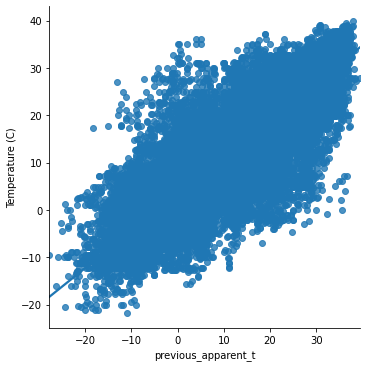

In [189]:
import seaborn as sns
df = pd.concat([X, y], axis=1)
sns.lmplot(x='previous_apparent_t', y='Temperature (C)',data=df,fit_reg=True) 

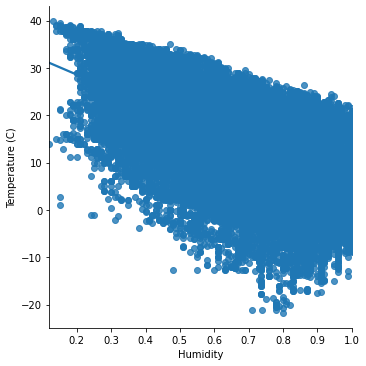

In [190]:
sns.lmplot(x='Humidity', y='Temperature (C)',data=df,fit_reg=True) 

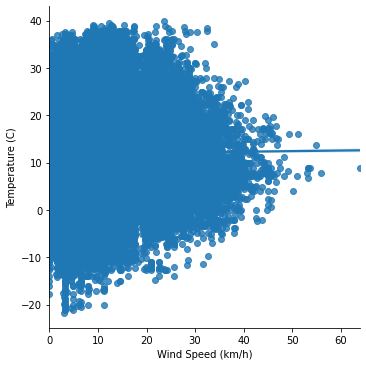

In [191]:
sns.lmplot(x='Wind Speed (km/h)', y='Temperature (C)',data=df,fit_reg=True) 

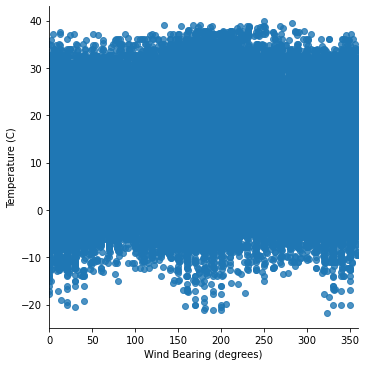

In [192]:
sns.lmplot(x='Wind Bearing (degrees)', y='Temperature (C)',data=df,fit_reg=True) 

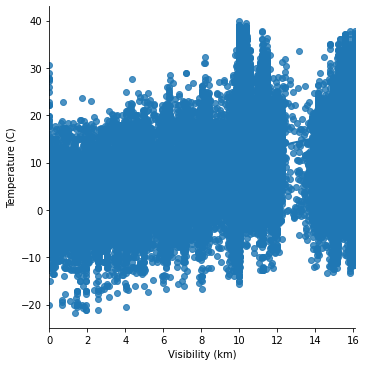

In [193]:
sns.lmplot(x='Visibility (km)', y='Temperature (C)',data=df,fit_reg=True) 

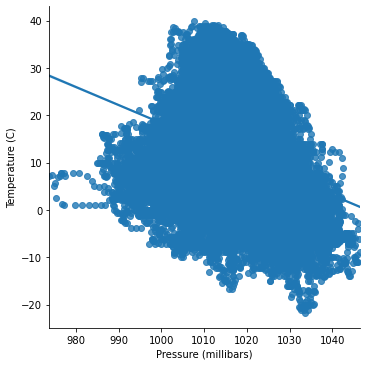

In [194]:
sns.lmplot(x='Pressure (millibars)', y='Temperature (C)',data=df,fit_reg=True) 

Кажется, что во всех числовых признаках зависимость линейная

$y_i = \beta_0+$

**Пункт 3.** Оцените выбранную модель при помощи МНК. Значима ли регрессия в целом? Если да, переходите к следующему пункту, если нет, то задайте другую функциональную форму модели.

In [200]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model = sm.OLS(endog=y, exog=X_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.695e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:47:14   Log-Likelihood:            -2.6207e+05
No. Observations:               96453   AIC:                         5.242e+05
Df Residuals:                   96419   BIC:                         5.245e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              160.7792      4.080     39.411      0.000     152.783     168.775
previous_apparent_t                  0.5476      0.002    357.835      0.000       0.545       0.551
Humidity                           -13.4109      0.081   -165.183      0.000     -13.570     -13.252
Wind Speed (km/h)                   -0.1141      0.002    -53.664      0.000      -0.118      -0.110
Wind Bearing (degrees)              -0.0011      0.000     -9.540      0.000      -0.001      -0.001
Visibility (km)                      0.0383      0.004     10.240      0.000       0.031       0.046
Pressure (millibars)                -0.1369      0.002    -79.070      0.000      -0.140      -0.134
Summary_Breezy                      -3.0572      3.697     -0.827      0.408     -10.304       4.190
Summary_Breezy and Dry              -3.5037      5.181     -0.676      0.499     -13.658       6.651
Summary_Breezy and Foggy            -2.8875      3.716     -0.777      0.437     -10.171       4.396
Summary_Breezy and Mostly Cloudy    -3.8417      3.667     -1.048      0.295     -11.029       3.346
Summary_Breezy and Overcast         -4.1935      3.667     -1.144      0.253     -11.381       2.994
Summary_Breezy and Partly Cloudy    -4.2092      3.668     -1.147      0.251     -11.399       2.981
Summary_Clear                       -4.2477      3.665     -1.159      0.246     -11.431       2.936
Summary_Drizzle                     -3.0898      3.711     -0.833      0.405     -10.364       4.184
Summary_Dry                         -1.8158      3.718     -0.488      0.625      -9.103       5.472
Summary_Dry and Mostly Cloudy       -4.1970      3.793     -1.106      0.269     -11.632       3.238
Summary_Dry and Partly Cloudy       -3.2700      3.686     -0.887      0.375     -10.495       3.955
Summary_Foggy                       -4.1265      3.665     -1.126      0.260     -11.310       3.057
Summary_Humid and Mostly Cloudy     -2.2335      3.710     -0.602      0.547      -9.506       5.039
Summary_Humid and Overcast          -2.5967      3.918     -0.663      0.507     -10.275       5.082
Summary_Humid and Partly Cloudy     -1.4763      3.771     -0.391      0.695      -8.867       5.915
Summary_Light Rain                  -4.0104      3.693     -1.086      0.278     -11.249       3.229
Summary_Mostly Cloudy               -4.1234      3.665     -1.125      0.261     -11.306       3.059
Summary_Overcast                    -4.5637      3.665     -1.245      0.213     -11.746       2.619
Summary_Partly Cloudy               -3.8048      3.665     -1.038      0.299     -10.988       3.378
Summary_Rain                        -2.3712      3.844     -0.617      0.537      -9.905       5.162
Summary_Windy                       -4.0288      3.88

F-статистика обладает крайне большим значением, гипотеза о незначимости регрессии отвергается на любом разумном уровне значимости, получили адекватную модель, идём дальше

**Пункт 4.** Прокомментируйте значимость отдельных коэффициентах в оценённой модели. Поясните, как каждый регрессор влияет на зависимую переменную математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

Будем комментировать только значимые переменные, для которых p-value t-теста о незначимости регрессора меньше 0.05 (берём 5%-ый уровень значимости). Интерпретация:

* При увеличении температуры в этот же час день назад на 1 градус прогноз для температуры сейчас увеличивается в-среднем на 0.55 градуса (Очевидно, это вызвано тем, что температура воздуха между днями редко меняется значительно)
* При увеличении влажности воздуха на 100% прогноз для температуры уменьшается в-среднем на 13 градусов (то есть изменение на 1% влечёт за собой снижение на 0.13 градуса) (Это может быть вызвано тем, что высокая влажность воздуха свойственна снегопадам и зимней погоде, вероятно, сильно коррелирует с дамми-переменной снега)
* При увеличении скорости ветра на 1 километр в секунду прогноз для температуры уменьшается в-среднем на 0.11 градуса (Сильный ветер обычно является индикатором антициклона, вызывающего холодную погоду)
* При увеличении направления ветра на 1 градус прогноз для температуры уменьшается в среднем на 0.001 градус (это может быть вызвано тем, что тёплые и холодные ветра идут с разных сторон в рассматриваемом городе)
* При увеличении видимости на 1 километр прогноз для температуры увеличивается в среднем на 0.038 градуса (Это может быть вызвано тем, что туманы чаще всего случаются в относительно более прохладную погоду)
* При увеличении давления на 1 миллибар прогноз для температуры уменьшается в среднем на 0.137 градуса (это интуитивно можно объяснить тем, что высокое атмосферное давление является [предвестником антициклонов](https://ru.wikipedia.org/wiki/Атмосферное_давление#Изменчивость_и_влияние_на_погоду))
* В случае, если тип осадков=Снег, то прогноз для температуры уменьшается в-среднем на 4.93 градуса (это очевидно объясняется тем, что снег обычно бывает только в холодную погоду в окрестности нуля и ниже)

**Пункт 5.** Есть ли в модели проблема мультиколлинеарности? Используйте как минимум два показателя (на ваш выбор), чтобы подтвердить ваш ответ. Если проблема обнаружена, скорректируйте её, или приведите обоснование, почему корректировка не требуется.

Существует как минимум две предпосылки для существования проблемы мультиколлинеарности:

1. Констатация факта - statsmodels выдал предупреждение о возможном наличии мультиколлинеарности (абсурдная предпосылка, не являющаяся таковой по сути)

2. Логика - в дамми-переменных для общего описания дня есть очень похожие между собой состояния, которые хоть и не пересекаются, но вполне вероятно составляют из себя линейную комбинацию числовых признаков, описывающих данное состояние (например, низкая влажность воздуха+низкое давление+низкая скорость ветра + определённое направление ветра = Состояние "Clear" и множество других аналогичных случаев). Также есть гипотеза, что высокая влажность воздуха сильно коррелирует с часами в днях, когда имеет место тип осадков "Снег". И ещё есть предположение, что состояние "Туманно" сильно скоррелированно с низкой видимостью. 

Проверим последнее предположение

In [202]:
np.corrcoef([X_sm['Summary_Foggy'], X_sm['Visibility (km)']])

array([[ 1.        , -0.59361322],
       [-0.59361322,  1.        ]])

Видим, что действительно существует весомая корреляция между рассматриваемыми переменными, теперь проведём настоящий полноценный тест:

Проверим коэффициент детерминации для всех объясняющих переменных при регрессии на остальные факторы через VIF'ы:

In [218]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vifs = np.zeros(len(X_sm.T))
for i in range(len(X_sm.T)):
    vifs[i] = variance_inflation_factor(model.model.exog, i)
print(vifs)

[1.19633592e+05 1.92619449e+00 1.80457047e+00 1.55347665e+00
 1.02404555e+00 1.76906425e+00 1.28708403e+00 5.49855753e+01
 2.00033853e+00 3.60031775e+01 5.14380364e+02 5.26261334e+02
 3.85559810e+02 9.67026682e+03 4.00170584e+01 3.50168512e+01
 1.50103078e+01 8.70018359e+01 6.62592080e+03 4.10205309e+01
 8.00621454e+00 1.80125599e+01 6.40051626e+01 1.99280408e+04
 1.37528652e+04 2.13121113e+04 1.10094777e+01 9.00039653e+00
 2.00027536e+00 5.00110220e+00 3.59916703e+01 4.59850749e+01
 6.79603646e+01 1.43333824e+00]


Исключим те переменные, для которых VIF>12:

In [227]:
X_sm.T.iloc[np.where(vifs>12)].T.columns

Index(['const', 'Summary_Breezy', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Partly Cloudy',
       'Summary_Light Rain', 'Summary_Mostly Cloudy', 'Summary_Overcast',
       'Summary_Partly Cloudy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy'],
      dtype='object')

In [228]:
X_truncated = X_sm.drop(X_sm.T.iloc[np.where(vifs>12)].T.columns, axis=1)
X_truncated

,previous_apparent_t,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Humid and Overcast,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Precip Type_snow
0,0.000000,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0
1,0.000000,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0
2,0.000000,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0
3,0.000000,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0
4,0.000000,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,24.905556,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,0,0,0
96449,22.366667,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,0,0,0
96450,21.016667,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,0,0,0
96451,19.927778,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,0,0,0


Видим, что у нас остались только числовые признаки + несколько фиктивных переменных, отвечающих за определённое состояние + индикатор снежности.

Возможно, для менее жёсткого исключения регрессоров, стоило последовательно исключать их по убыванию VIF вплоть до момента, пока у всех регрессоров собственный VIF не был бы равен 12 или меньше

In [230]:
vifs = np.zeros(len(X_truncated.T))
for i in range(len(X_truncated.T)):
    vifs[i] = variance_inflation_factor(model.model.exog, i)
print(vifs)

[ 3.61936081 23.68840208  3.7824654   4.12773556  8.82122835 52.76908768
  1.0001718   1.00056146  1.00071431  1.00190705  1.00025955  1.00159293
  1.55866815]


Видим, что после исключения всех вредных переменных, у нас всё ещё есть две переменных, характеризующихся мультиколлинеарностью - влажность воздуха и атмосферное давление. Не будем исключать их, поскольку они оказывают большое влияние на зависимую переменную, а также играют действительно важную роль на формирование температуры, как было объяснено выше при интерпретации зависимостей

В процессе исключения всего подряд, наверное зря выкинули константу, поскольку она немного ломает $R^2$. Вернём:

In [231]:
X_truncated = sm.add_constant(X_truncated)
model = sm.OLS(endog=y, exog=X_truncated).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 4.279e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        22:42:28   Log-Likelihood:            -2.6231e+05
No. Observations:               96453   AIC:                         5.246e+05
Df Residuals:                   96439   BIC:                         5.248e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        154.0864      1.765     87.323      0.000     150.628     157.545
previous_apparent_t            0.5509      0.002    361.622      0.000       0.548       0.554
Humidity                     -13.7690      0.078   -176.331      0.000     -13.922     -13.616
Wind Speed (km/h)             -0.1169      0.002    -62.023      0.000      -0.121      -0.113
Wind Bearing (degrees)        -0.0010      0.000     -8.778      0.000      -0.001      -0.001
Visibility (km)                0.0430      0.003     13.589      0.000       0.037       0.049
Pressure (millibars)          -0.1342      0.002    -78.478      0.000      -0.138      -0.131
Summary_Breezy and Dry         0.4472      3.672      0.122      0.903      -6.750       7.645
Summary_Humid and Overcast     1.5172      1.388      1.093      0.274      -1.204       4.238
Summary_Rain                   1.8383      1.162      1.583      0.114      -0.438       4.115
Summary_Windy                  0.1150      1.299      0.089      0.929      -2.432       2.662
Summary_Windy and Dry          3.3932      3.672      0.924      0.355      -3.805      10.591
Summary_Windy and Foggy        4.2910      1.837      2.335      0.020       0.690       7.892
Precip Type_snow              -4.9265      0.045   -109.986      0.000      -5.014      -4.839
==============================================================================
Omnibus:                     5831.321   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22190.753
Skew:                          -0.194   Prob(JB):                         0.00
Kurtosis:                       5.317   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Пункт 6.** Проведите как минимум три теста для идентификации гетероскедастичности. Если гетероскедастичность обнаружена, скорректируйте доверительные интервалы для коэффициентов каким-нибудь способом. Изменилась ли значимость каких-либо коэффициентов?

Не будем мудрствовать лукаво и проведём 3 теста, которые были приведены на семинарах:

In [232]:
sms.het_goldfeldquandt(model.model.endog, model.model.exog)

(1.0304623325106697, 0.0004931521178353133, 'increasing')

In [233]:
sms.het_breuschpagan(model.resid, model.model.exog)

(540.9559725613938,
 2.879370695616647e-107,
 41.840620801510426,
 1.3980328554767304e-107)

В соответствии с обоими тестами с семинаров (даже самым "слепым" по отношению к гетероскедастичности), можем заключить о присутствии гетероскедастичности в данных

Тест Уайта сломался, не было времени разбираться в причинах, поэтому реализуем [тест Парка](https://ru.wikipedia.org/wiki/Тест_Парка)

In [246]:
df_res = pd.concat([X_truncated, model.resid.rename("res")], axis=1)
df_res

,const,previous_apparent_t,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy and Dry,Summary_Humid and Overcast,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Precip Type_snow,res
0,1.0,0.000000,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,5.091043
1,1.0,0.000000,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,4.653157
2,1.0,0.000000,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0,3.905368
3,1.0,0.000000,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,3.269040
4,1.0,0.000000,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0,3.381758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1.0,24.905556,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,0,0,0,0.885370
96449,1.0,22.366667,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,0,0,0,1.553989
96450,1.0,21.016667,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,0,0,0,0.778315
96451,1.0,19.927778,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,0,0,0,1.622159


В качестве переменной, вызывающей гетероскедастичность, возьмём видимость, поскольку по t-значению при коэффициенте эта переменная кажется наиболее влияющей на зависимую переменную среди переменных, не содержащих отрицательные значения (надо логарифмировать её для теста)

In [253]:
df_res['ln_Humidity'] = np.log(df_res.Humidity)

In [254]:
model_res = smf.ols(data=df_res, formula='res ~ ln_Humidity').fit()

model_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    res   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.67
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.15e-06
Time:                        22:56:40   Log-Likelihood:            -2.6230e+05
No. Observations:               96453   AIC:                         5.246e+05
Df Residuals:                   96451   BIC:                         5.246e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0632      0.018     -3.598      0.000      -0.098      -0.029
ln_Humidity    -0.1791      0.037     -4.865      0.000      -0.251      -0.107
==============================================================================
Omnibus:                     5844.940   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22094.418
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       5.311   Cond. No.                         3.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что и гипотеза о незначимости данной регрессии в целом, и о незначимости регрессора при влиянии на остатки исходной модели отвергается на любом разумном уровне значимости - можем заключить о присутствии гетероскедастичности, вызванной именно уровнем видимости.

По итогам проведённых тестов последовательно проведём две манипуляции: 
1. Сначала переоценим модель с учётом робастных стандартных ошибок
2. затем уберём плохую переменную Humidity, отличающуюся и большим VIF, и гарантированно вызывающую гетероскедастичность

In [255]:
model = sm.OLS(endog=y, exog=X_truncated).fit(cov_type = 'HC0')

model.summary()

C:\Users\zolotarev\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 13, but rank is 12
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 1.871e+05
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:02:04   Log-Likelihood:            -2.6231e+05
No. Observations:               96453   AIC:                         5.246e+05
Df Residuals:                   96439   BIC:                         5.248e+05
Df Model:                          13                                         
Covariance Type:                  HC0                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        154.0864      1.856     83.032      0.000     150.449     157.724
previous_apparent_t            0.5509      0.002    274.449      0.000       0.547       0.555
Humidity                     -13.7690      0.093   -147.916      0.000     -13.951     -13.587
Wind Speed (km/h)             -0.1169      0.002    -57.687      0.000      -0.121      -0.113
Wind Bearing (degrees)        -0.0010      0.000     -8.719      0.000      -0.001      -0.001
Visibility (km)                0.0430      0.003     14.095      0.000       0.037       0.049
Pressure (millibars)          -0.1342      0.002    -75.052      0.000      -0.138      -0.131
Summary_Breezy and Dry         0.4472      0.053      8.418      0.000       0.343       0.551
Summary_Humid and Overcast     1.5172      0.627      2.421      0.015       0.289       2.745
Summary_Rain                   1.8383      0.302      6.092      0.000       1.247       2.430
Summary_Windy                  0.1150      0.515      0.223      0.823      -0.894       1.124
Summary_Windy and Dry          3.3932      0.066     51.229      0.000       3.263       3.523
Summary_Windy and Foggy        4.2910      1.294      3.315      0.001       1.754       6.828
Precip Type_snow              -4.9265      0.048   -101.951      0.000      -5.021      -4.832
==============================================================================
Omnibus:                     5831.321   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22190.753
Skew:                          -0.194   Prob(JB):                         0.00
Kurtosis:                       5.317   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что по сравнению с исходной моделью доверительные интревалы для коэффициентов стали несколько шире, а также все дамми-переменные, которые раньше были незначимыми, теперь на уровне значимости 5% являются значимыми (гипотеза о незначимости в t-тесте не отвергается), за исключением фиктивной переменной, отвечающей за ветренную погоду

In [257]:
X_truncated.drop('Humidity', axis=1, inplace=True)

In [258]:
model = sm.OLS(endog=y, exog=X_truncated).fit(cov_type = 'HC0')

model.summary()

C:\Users\zolotarev\Anaconda3\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 12, but rank is 11
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 1.627e+05
Date:                Wed, 15 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:04:31   Log-Likelihood:            -2.7579e+05
No. Observations:               96453   AIC:                         5.516e+05
Df Residuals:                   96440   BIC:                         5.517e+05
Df Model:                          12                                         
Covariance Type:                  HC0                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         77.1354      1.935     39.855      0.000      73.342      80.929
previous_apparent_t            0.6849      0.002    361.224      0.000       0.681       0.689
Wind Speed (km/h)             -0.0135      0.002     -6.438      0.000      -0.018      -0.009
Wind Bearing (degrees)        -0.0022      0.000    -17.892      0.000      -0.002      -0.002
Visibility (km)                0.1782      0.003     52.115      0.000       0.171       0.185
Pressure (millibars)          -0.0722      0.002    -38.149      0.000      -0.076      -0.068
Summary_Breezy and Dry         3.2558      0.059     54.970      0.000       3.140       3.372
Summary_Humid and Overcast    -2.2972      0.665     -3.454      0.001      -3.601      -0.994
Summary_Rain                   0.9971      0.408      2.445      0.014       0.198       1.796
Summary_Windy                  0.2888      0.554      0.522      0.602      -0.796       1.374
Summary_Windy and Dry          4.9653      0.077     64.404      0.000       4.814       5.116
Summary_Windy and Foggy       -0.6293      1.508     -0.417      0.676      -3.585       2.326
Precip Type_snow              -4.4495      0.053    -84.497      0.000      -4.553      -4.346
==============================================================================
Omnibus:                     6503.909   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32196.806
Skew:                           0.076   Prob(JB):                         0.00
Kurtosis:                       5.826   Cond. No.                     3.21e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Видим, что исключение Humidity не дало полного устранения мультиколлинеарности, однако теперь мы можем гарантированно быть уверенны в том, что гетероскедастичности стало меньше

**Пункт 7.** Проведите какой-нибудь тест для идентификации эндогенности. Если эндогенность обнаружена, скорректируйте её каким-нибудь способом.

**Пункт 8.** Если после проведённых корректировок интерпретация каких-либо параметров модели изменилась, приведите новую интерпретацию. Сделайте финальный вывод о том, какие факторы влияют на температуру воздуха.

Интерпретация уже интерпертированных ранее коэффициентов не изменилась значительно, поскольку знак при них не изменился. Однако некоторые фиктивные переменные стали значимыми и все они интерпретируются примерно так "Если на улице так-то так-то, то в-среднем от знания этого факта прогноз температуры увеличится\уменьшится на столько-то градусов, это можно объяснить тем, что когда на улице так-то так-то, то действительно обычно такое происходит в тёплую\холодную погоду"

**Построение предиктивной модели.**

Воспользуйтесь вашими знаниями из машинного обучения и постройте хорошую предиктивную линейную регрессионную модель для предсказания температуры воздуха. Используйте MAE для выбора лучшей модели. 

Поскольку мы имеем дело с датасетом, представляющим из себя временные ряды, здесь нельзя делать обычную кросс-валидацию, поэтому сделаем деление на трейн\валидацию\тест следующим образом:
* трейн - первые 80% выборки по порядку
* валидация - следующие 10%
* тест - оставшиеся 10%

Учитывая тот факт, что в датасете данные более чем за 10 лет, у нас гарантированно будет полный год, поэтому разница значений метрик в валидации\тесте\трейне может быть вызвана только аномалиями конкретных лет (сезон дождей, аномальный антициклон и т.д.), но не сезонностью, играющей важную роль в прогнозировании температуры воздуха

In [261]:
X_train = X.iloc[:int(len(X)*0.8)]
X_val = X.iloc[int(len(X)*0.8)+1:int(len(X)*0.9)]
X_test = X.iloc[int(len(X)*0.9)+1:]

y_train = y.iloc[:int(len(y)*0.8)]
y_val = y.iloc[int(len(y)*0.8)+1:int(len(y)*0.9)]
y_test = y.iloc[int(len(y)*0.9)+1:]

print(len(y_train), len(y_val), len(y_test))

77162 9644 9645


В качестве альтернативы регрессии будем обучать градиентный бустинг, поскольку через архитектуру решающих деревьев, кажется, можно довольно хорошо предсказывать погоду, особенно с имеющимися в нашем распоряжении данными

На валидации подбираем лучший набор гиперпараметров, в тест вообще не заглядываем. Будем использовать его для сравнения с объясняющей моделью чуть попозже

In [266]:
from tqdm import tqdm
from catboost import CatBoostRegressor
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import mean_absolute_error

params = {'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2],
        'depth': [4, 6, 8, 10, 12, 14, 16],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
        'iterations': [200, 500, 1000, 1500]}
param_list = list(ParameterSampler(param_distributions=params, n_iter=100, random_state=21))
mae = np.zeros_like(np.arange(len(param_list)), dtype=float)
print(param_list[0].keys())
with tqdm(total=len(param_list)-1) as pbar:
    for i in range(len(param_list)):
        print(param_list[i].values())
        values = [*param_list[i].values()]
        cb_reg = CatBoostRegressor(depth=values[3], l2_leaf_reg=values[1], 
                                    iterations=values[2], learning_rate=values[0],
                                    random_state=21)
        cb_reg.fit(X=X_train, y=y_train, plot=False,
                   eval_set=[(X_val, y_val)], 
                  verbose=False)
        y_pred = cb_reg.predict(X_val)
        mae[i] = mean_absolute_error(y_pred, y_val)
        print('mae =', mae[i])
        pbar.update(1)

  0%|                                                                                           | 0/99 [00:00<?, ?it/s]

dict_keys(['learning_rate', 'l2_leaf_reg', 'iterations', 'depth'])
dict_values([0.05, 7, 200, 12])


  1%|▊                                                                                  | 1/99 [00:13<22:50, 13.98s/it]

mae = 2.3332913040044145
dict_values([0.001, 1, 200, 10])


  2%|█▋                                                                                 | 2/99 [00:18<13:53,  8.60s/it]

mae = 6.432284378866307
dict_values([1e-05, 7, 1500, 8])


  3%|██▌                                                                                | 3/99 [00:34<18:34, 11.61s/it]

mae = 7.425295194559059
dict_values([0.0001, 1, 500, 6])


  4%|███▎                                                                               | 4/99 [00:37<13:34,  8.57s/it]

mae = 7.230064398910769
dict_values([0.1, 3, 200, 16])


  5%|████                                                                             | 5/99 [04:21<2:14:44, 86.00s/it]

mae = 2.3635689678891763
dict_values([0.0001, 3, 500, 10])


  6%|████▉                                                                            | 6/99 [04:34<1:34:44, 61.12s/it]

mae = 7.221064455039904
dict_values([0.0001, 3, 500, 16])


  6%|████▉                                                                            | 6/99 [07:37<1:58:06, 76.19s/it]


KeyboardInterrupt: 

Блин, я не увидел "линейную регрессионную" в "постройте хорошую предиктивную линейную регрессионную модель", и поздно понял, что дальнейшие пункты для бустинга проверить не получится...

В таком случае обучим gblinear из xgboost:

In [274]:
import xgboost as xgb
params = {'updater': ['coord_descent'],
        'feature_selector': ['cyclic', 'shuffle', 'random', 'greedy', 'thrifty'],
        'lambda': [0, 1, 3, 5, 7, 9],
        'alpha': [0, 1, 3, 5, 7, 9]}
param_list = list(ParameterSampler(param_distributions=params, n_iter=50, random_state=21))
mae = np.zeros_like(np.arange(len(param_list)), dtype=float)
print(param_list[0].keys())
with tqdm(total=len(param_list)-1) as pbar:
    for i in range(len(param_list)):
        print(param_list[i].values())
        values = [*param_list[i].values()]
        xgb_reg = xgb.XGBRegressor(alpha=values[3], reg_lambda=values[1], 
                                    feature_selector=values[2], updater=values[0],
                                    booster='gblinear', random_state=21)
        xgb_reg.fit(X=X_train, y=y_train,
                   eval_set=[(X_val, y_val)], verbose=False)
        y_pred = xgb_reg.predict(X_val)
        mae[i] = mean_absolute_error(y_pred, y_val)
        print('mae =', mae[i])
        pbar.update(1)

  0%|                                                                                           | 0/49 [00:00<?, ?it/s]

dict_keys(['updater', 'lambda', 'feature_selector', 'alpha'])
dict_values(['coord_descent', 1, 'random', 0])


  2%|█▋                                                                                 | 1/49 [00:01<01:33,  1.94s/it]

mae = 2.8279048874800425
dict_values(['coord_descent', 1, 'greedy', 0])


  4%|███▍                                                                               | 2/49 [00:09<04:02,  5.16s/it]

mae = 2.8303907164412463
dict_values(['coord_descent', 0, 'thrifty', 7])


  6%|█████                                                                              | 3/49 [00:10<02:42,  3.54s/it]

mae = 3.131128528148322
dict_values(['coord_descent', 7, 'shuffle', 7])


  8%|██████▊                                                                            | 4/49 [00:12<01:58,  2.64s/it]

mae = 3.2526132702201163
dict_values(['coord_descent', 9, 'greedy', 9])


 10%|████████▍                                                                          | 5/49 [00:19<03:11,  4.35s/it]

mae = 3.3477214340332924
dict_values(['coord_descent', 5, 'shuffle', 0])


 12%|██████████▏                                                                        | 6/49 [00:21<02:34,  3.59s/it]

mae = 2.884591900878073
dict_values(['coord_descent', 3, 'cyclic', 9])


 14%|███████████▊                                                                       | 7/49 [00:23<02:02,  2.92s/it]

mae = 3.2335245614182515
dict_values(['coord_descent', 5, 'cyclic', 7])


 16%|█████████████▌                                                                     | 8/49 [00:24<01:40,  2.44s/it]

mae = 3.216731496602661
dict_values(['coord_descent', 3, 'random', 5])


 18%|███████████████▏                                                                   | 9/49 [00:26<01:24,  2.12s/it]

mae = 3.1348886267752345
dict_values(['coord_descent', 3, 'cyclic', 0])


 20%|████████████████▋                                                                 | 10/49 [00:28<01:21,  2.09s/it]

mae = 2.860641519280933
dict_values(['coord_descent', 3, 'thrifty', 5])


 22%|██████████████████▍                                                               | 11/49 [00:29<01:11,  1.89s/it]

mae = 3.13445268142698
dict_values(['coord_descent', 1, 'shuffle', 5])


 24%|████████████████████                                                              | 12/49 [00:30<01:03,  1.72s/it]

mae = 3.1032996709934384
dict_values(['coord_descent', 7, 'random', 9])


 27%|█████████████████████▊                                                            | 13/49 [00:32<00:57,  1.59s/it]

mae = 3.3091087472085015
dict_values(['coord_descent', 5, 'greedy', 0])


 29%|███████████████████████▍                                                          | 14/49 [00:39<01:59,  3.41s/it]

mae = 2.8882649927760107
dict_values(['coord_descent', 0, 'random', 5])


 31%|█████████████████████████                                                         | 15/49 [00:41<01:34,  2.79s/it]

mae = 3.088747922864574
dict_values(['coord_descent', 9, 'greedy', 3])


 33%|██████████████████████████▊                                                       | 16/49 [00:52<02:57,  5.38s/it]

mae = 3.099041960300419
dict_values(['coord_descent', 7, 'random', 7])


 35%|████████████████████████████▍                                                     | 17/49 [00:54<02:19,  4.37s/it]

mae = 3.2529654508167387
dict_values(['coord_descent', 9, 'random', 0])


 37%|██████████████████████████████                                                    | 18/49 [00:57<02:05,  4.04s/it]

mae = 2.9370284742787183
dict_values(['coord_descent', 3, 'greedy', 0])


 39%|███████████████████████████████▊                                                  | 19/49 [01:07<02:51,  5.73s/it]

mae = 2.8649414911763524
dict_values(['coord_descent', 3, 'greedy', 7])


 41%|█████████████████████████████████▍                                                | 20/49 [01:15<03:03,  6.34s/it]

mae = 3.181665621129778
dict_values(['coord_descent', 5, 'random', 1])


 43%|███████████████████████████████████▏                                              | 21/49 [01:16<02:14,  4.82s/it]

mae = 2.927794129542395
dict_values(['coord_descent', 5, 'thrifty', 3])


 45%|████████████████████████████████████▊                                             | 22/49 [01:17<01:42,  3.81s/it]

mae = 3.043170478417415
dict_values(['coord_descent', 0, 'greedy', 5])


 47%|██████████████████████████████████████▍                                           | 23/49 [01:25<02:09,  4.98s/it]

mae = 3.088273410989484
dict_values(['coord_descent', 5, 'greedy', 9])


 49%|████████████████████████████████████████▏                                         | 24/49 [01:34<02:35,  6.21s/it]

mae = 3.270801989498765
dict_values(['coord_descent', 5, 'thrifty', 5])


 51%|█████████████████████████████████████████▊                                        | 25/49 [01:36<01:54,  4.78s/it]

mae = 3.167195208123672
dict_values(['coord_descent', 0, 'random', 1])


 53%|███████████████████████████████████████████▌                                      | 26/49 [01:37<01:26,  3.77s/it]

mae = 2.8710032324790076
dict_values(['coord_descent', 7, 'greedy', 1])


 55%|█████████████████████████████████████████████▏                                    | 27/49 [01:44<01:45,  4.79s/it]

mae = 2.953432382302678
dict_values(['coord_descent', 0, 'shuffle', 0])


 57%|██████████████████████████████████████████████▊                                   | 28/49 [01:46<01:23,  3.97s/it]

mae = 2.7421157591004732
dict_values(['coord_descent', 7, 'greedy', 0])


 59%|████████████████████████████████████████████████▌                                 | 29/49 [01:55<01:48,  5.41s/it]

mae = 2.9120455292913254
dict_values(['coord_descent', 5, 'shuffle', 7])


 61%|██████████████████████████████████████████████████▏                               | 30/49 [01:56<01:19,  4.19s/it]

mae = 3.21672770088568
dict_values(['coord_descent', 7, 'shuffle', 1])


 63%|███████████████████████████████████████████████████▉                              | 31/49 [01:58<01:00,  3.36s/it]

mae = 2.9537632869366073
dict_values(['coord_descent', 3, 'cyclic', 3])


 65%|█████████████████████████████████████████████████████▌                            | 32/49 [01:59<00:47,  2.79s/it]

mae = 3.0181149926736195
dict_values(['coord_descent', 7, 'shuffle', 3])


 67%|███████████████████████████████████████████████████████▏                          | 33/49 [02:01<00:37,  2.36s/it]

mae = 3.0701655065994387
dict_values(['coord_descent', 1, 'cyclic', 9])


 69%|████████████████████████████████████████████████████████▉                         | 34/49 [02:02<00:30,  2.06s/it]

mae = 3.197069772293729
dict_values(['coord_descent', 7, 'random', 5])


 71%|██████████████████████████████████████████████████████████▌                       | 35/49 [02:03<00:26,  1.86s/it]

mae = 3.2013095379675076
dict_values(['coord_descent', 3, 'thrifty', 0])


 73%|████████████████████████████████████████████████████████████▏                     | 36/49 [02:06<00:26,  2.05s/it]

mae = 2.8605523421715713
dict_values(['coord_descent', 1, 'thrifty', 5])


 76%|█████████████████████████████████████████████████████████████▉                    | 37/49 [02:08<00:23,  1.95s/it]

mae = 3.103312387458712
dict_values(['coord_descent', 3, 'thrifty', 7])


 78%|███████████████████████████████████████████████████████████████▌                  | 38/49 [02:10<00:21,  1.98s/it]

mae = 3.181619293024075
dict_values(['coord_descent', 5, 'shuffle', 9])


 80%|█████████████████████████████████████████████████████████████████▎                | 39/49 [02:12<00:19,  1.99s/it]

mae = 3.270691830037794
dict_values(['coord_descent', 5, 'cyclic', 9])


 82%|██████████████████████████████████████████████████████████████████▉               | 40/49 [02:13<00:16,  1.89s/it]

mae = 3.2706224556886476
dict_values(['coord_descent', 1, 'shuffle', 1])


 84%|████████████████████████████████████████████████████████████████████▌             | 41/49 [02:15<00:14,  1.84s/it]

mae = 2.8796574431015842
dict_values(['coord_descent', 0, 'thrifty', 9])


 86%|██████████████████████████████████████████████████████████████████████▎           | 42/49 [02:17<00:13,  1.96s/it]

mae = 3.179241669512717
dict_values(['coord_descent', 0, 'thrifty', 5])


 88%|███████████████████████████████████████████████████████████████████████▉          | 43/49 [02:19<00:11,  1.88s/it]

mae = 3.088306756336775
dict_values(['coord_descent', 9, 'greedy', 0])


 90%|█████████████████████████████████████████████████████████████████████████▋        | 44/49 [02:28<00:19,  3.95s/it]

mae = 2.937644315546166
dict_values(['coord_descent', 1, 'shuffle', 7])


 92%|███████████████████████████████████████████████████████████████████████████▎      | 45/49 [02:30<00:13,  3.27s/it]

mae = 3.1477456503463475
dict_values(['coord_descent', 3, 'shuffle', 3])


 94%|████████████████████████████████████████████████████████████████████████████▉     | 46/49 [02:31<00:08,  2.76s/it]

mae = 3.0171623011733635
dict_values(['coord_descent', 3, 'random', 1])


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 47/49 [02:33<00:04,  2.41s/it]

mae = 2.903025778219543
dict_values(['coord_descent', 5, 'greedy', 7])


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 48/49 [02:42<00:04,  4.37s/it]

mae = 3.2166606250978176
dict_values(['coord_descent', 9, 'greedy', 7])


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [02:51<00:00,  5.94s/it]

mae = 3.2892573401844887
dict_values(['coord_descent', 5, 'random', 3])


50it [02:53,  3.47s/it]                                                                                                

mae = 3.0434504024759628


In [275]:
np.min(mae)

2.7421157591004732

**Сравнение объясняющей и предиктивной моделей.**

**Пункт 1.** Является ли предиктивная модель значимой в целом? Что можно сказать о значимости отдельных коэффициентов? 

In [277]:
from sklearn.metrics import r2_score

values = ['coord_descent', 0, 'shuffle', 0]
xgb_reg = xgb.XGBRegressor(alpha=values[3], reg_lambda=values[1], 
                            feature_selector=values[2], updater=values[0],
                            booster='gblinear', random_state=21)
xgb_reg.fit(X, y)
y_pred = xgb_reg.predict(X)
print('mae =', mean_absolute_error(y_pred, y))
print('r2 =', r2_score(y_pred, y))

mae = 2.851950660648486
r2 = 0.810237811939681


In [286]:
pd.concat([pd.Series(X.columns), pd.Series(xgb_reg.coef_)], axis=1)

,0,1
0,previous_apparent_t,0.599582
1,Humidity,-9.731430
2,Wind Speed (km/h),-0.048474
3,Wind Bearing (degrees),-0.000719
4,Visibility (km),0.104958
5,Pressure (millibars),0.001867
6,Summary_Breezy,2.917010
7,Summary_Breezy and Dry,2.072420
8,Summary_Breezy and Foggy,3.754570
9,Summary_Breezy and Mostly Cloudy,2.418970


Можем заключить о значимости проведённой регрессии в силу высокого значения доли объяснённой дисперсии для всей рассматриваемой выборки (поскольку существует сильная связь между значимостью регрессии и метрикой $R^2$, при достигнутом значении можно даже не заморачиваться с тестом на значимость регрессии в целом)

Для отдельных коэффициентов значимость регрессии не проверил, поскольку строил регрессию не в statsmodels :(

Но видно, что переменная влажности оказывает значимое влияние на целевую переменную, поскольку её значение сильно отлично от 0

**Пункт 2.** Как различаются регрессоры объясняющей и предиктивной моделей? Есть ли такие регрессоры, которые вошли в одну, но не вошли в другую. Если да, приведите возможную содержательную интерпретацию этого явления.

In [282]:
model.params

const                         77.135374
previous_apparent_t            0.684908
Wind Speed (km/h)             -0.013494
Wind Bearing (degrees)        -0.002243
Visibility (km)                0.178199
Pressure (millibars)          -0.072203
Summary_Breezy and Dry         3.255772
Summary_Humid and Overcast    -2.297158
Summary_Rain                   0.997103
Summary_Windy                  0.288834
Summary_Windy and Dry          4.965283
Summary_Windy and Foggy       -0.629314
Precip Type_snow              -4.449474
dtype: float64

Модели не совсем сравнимы, поскольку для предиктивной модели нас не так заботит проблема мультиколлинеарности (особенно в бустинге), поэтому туда включены все регрессоры, которые я изначально хотел использовать. При этом в бустинге нет константы, поэтому значения многих фиктивных переменных сильно больше, чем тех, которые остались в объясняющей модели. Коэффициент при фиктивной переменной снега в бустинге оказался больше по абсолютному значению, тогда как видимость оказывает в 2 раза большее влияние в объясняющей модели

**Пункт 3.** На основе предыдущего анализа, сделайте вывод, можно ли использовать объясняющую модель для предсказания, а предиктивную -- для объяснений. Если да, то сравните предсказательную и объяснительную силу этих моделей на основе каких-нибудь метрик.

Объясняющую модель можно использовать для предсказания, поскольку на всей выборке доля объяснённой моделью дисперсии между двумя моделями сопоставима (уже посчитано, для объясняющей это 0.805, для предиктивной - 0.810), тогда как предиктивную также можно использовать для объяснения, пользуясь интерпретацией, аналогичной той, что была дана для коэффициентов объясняющей модели

## Задача 2: "Борьба с гетероскедастичностью" (5 баллов).

Рассмотрим линейную регрессионную модель

$$y_i = 10+2x_i+\varepsilon_i$$

$$x_i \sim N(40, 4)$$

$$\varepsilon_i \sim N(0,x_i^2)$$

**Пункт 1.** Сгенерируйте выборку размера $n=50$. Оцените модель с помощью МНК. Прокомментируйте значимость регрессоров и проверьте  модель на гетероскедастичность при помощи вашего любимого теста. 

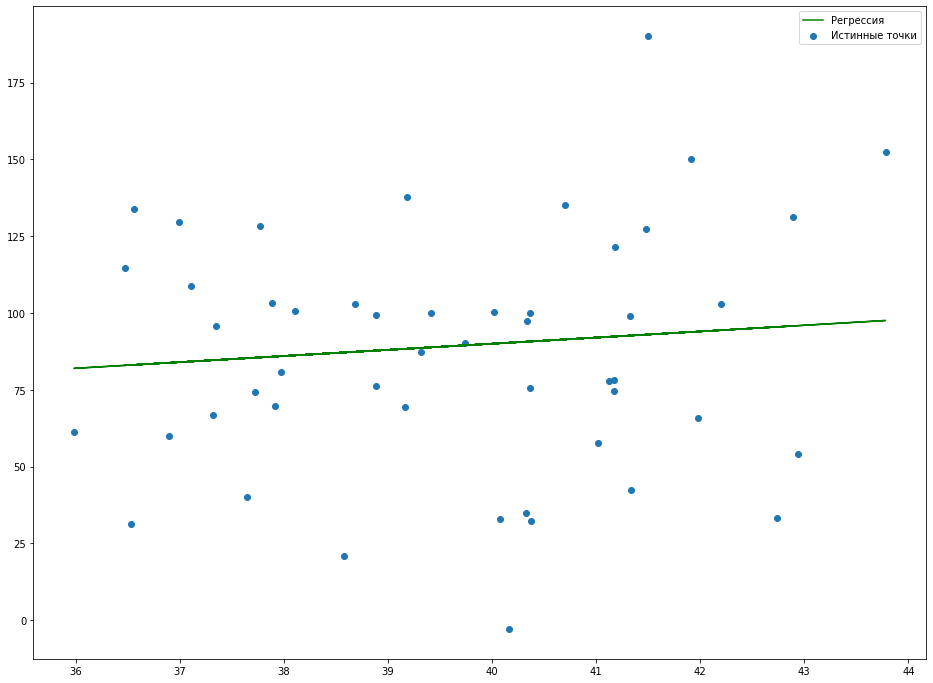

In [71]:
x = np.random.normal(loc=40.0, scale=2.0, size=50)
eps = np.random.normal(loc=0.0, scale=x, size=50)
y = 10+2*x+eps

plt.figure(figsize=(16, 12))
plt.scatter(x, y, label='Истинные точки')
plt.plot(x, y-eps, c='g', label='Регрессия')
plt.legend()
plt.show()

In [72]:
data = pd.DataFrame(np.vstack([x, y]).T, columns=['x', 'y'])
data.head()

,x,y
0,40.080120,32.900114
1,40.324972,34.739874
2,36.557294,133.976181
3,41.119734,77.709642
4,39.184713,137.672269


In [73]:
model = smf.ols(data=data, formula='y ~ x').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5463
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.463
Time:                        14:28:36   Log-Likelihood:                -253.29
No. Observations:                  50   AIC:                             510.6
Df Residuals:                      48   BIC:                             514.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5666    111.606      0.041      0.968    -219.833     228.966
x              2.0799      2.814      0.739      0.463      -3.578       7.738
==============================================================================
Omnibus:                        0.001   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.999   Jarque-Bera (JB):                0.102
Skew:                          -0.007   Prob(JB):                        0.950
Kurtosis:                       2.779   Cond. No.                         800.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Гипотеза о незначимости для константы отвергается на уровне значимости $\alpha=0.05$, в то время как гипотеза о незначимости для регрессора $X$ не отвергается на любом разумном уровне значимости

Проведём тест Голдфельда-Куандта на гетероскедастичность:
$$H_0: \sigma^2_i = \sigma^2$$
$$H_1: \sigma_i \sim X_i$$

In [74]:
sms.het_goldfeldquandt(y=model.model.endog, x=model.model.exog, alternative='increasing')

(0.7054709960278469, 0.7954575698986486, 'increasing')

Гипотеза об отсутствии гетероскедастичности в модели не отвергается на любом общепринятом уровне значимости в соответствии с проведённым тестом Голдфельда-Куандта. Гетероскедастичность не выявлена

In [75]:
sms.het_breuschpagan(model.resid, model.model.exog)

(2.2000434604261434,
 0.13800684656255377,
 2.209250671870931,
 0.14372464138326246)

Обе статистики лежат в окрестности 2.2, в обоих случаях гипотеза об отсутствии гетероскедастичности не отвергается с вероятностью ошибки первого рода >0.0

**Пункт 2.** Оцените модель с помощью WLS и выведите стандартные ошибки коэффициентов, устойчивые к гетероскедастичности. Сравните результаты оценки с результатами предыдущего пункта.

**Hint:** [о WLS и его связи с FGLS](https://en.wikipedia.org/wiki/Generalized_least_squares). 

В рамках WLS мы рассматриваем $\sigma_i^2$ как $\sigma^2\cdot\omega_i$. В нашем случае $\omega_i=x_i^2$. Значит нам необходимо всё поделить на $x_i$ (В соответствии с [этой статьёй](http://www3.grips.ac.jp/~yamanota/Lecture_Note_10_GLS_WLS_FGLS.pdf)) и найти МНК-оценку преобразованной модели:

In [76]:
y_weighted = y/x
const_weighted = 1/x
x_weighted = x/x
data = pd.DataFrame(np.vstack([const_weighted, y_weighted]).T, columns=['const_weighted', 'y_weighted'])
data.head()

,const_weighted,y_weighted
0,0.024950,0.820859
1,0.024799,0.861498
2,0.027354,3.664828
3,0.024319,1.889838
4,0.025520,3.513418


Поскольку в рамках коррекции гетероскедастичности взвешенный $x$ прерватился в константу, мы можем просто применить МНК-оценивание из statsmodels, держа в уме, что константой будет оценка взвешенного $x$

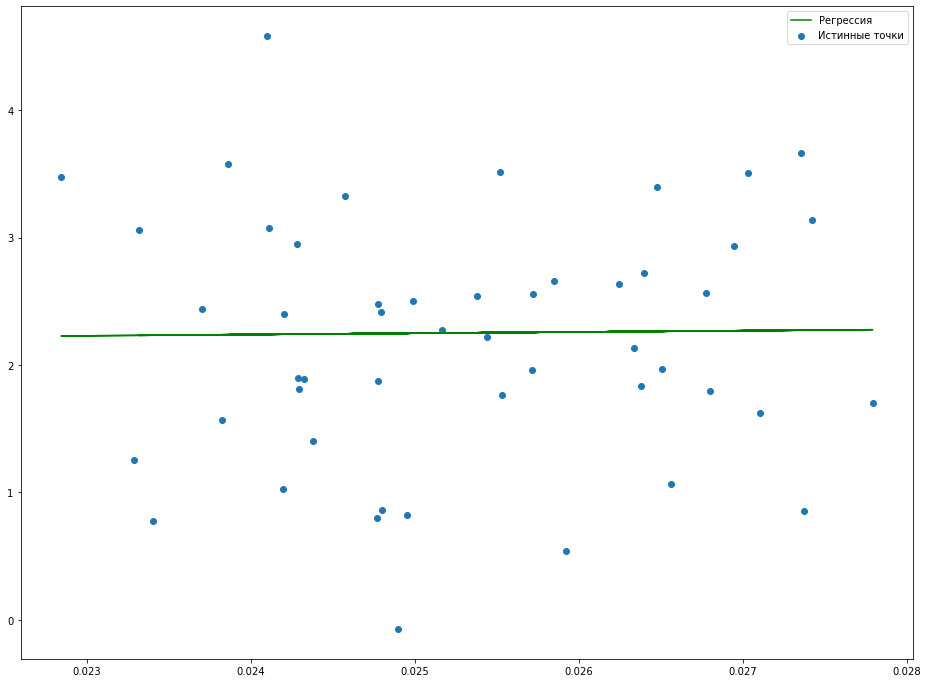

In [80]:
plt.figure(figsize=(16, 12))
plt.scatter(const_weighted, y_weighted, label='Истинные точки')
plt.plot(const_weighted, y_weighted-eps/x, c='g', label='Регрессия')
plt.legend()
plt.show()

Видим, что получившаяся модель кажется не особо высококачественной и взвешивание наблюдений для устранения гетероскедастичности дало более равномерное распределение ошибок по ходу возрастания независимой переменной, однако не улучшило модель

In [77]:
model2 = smf.wls(data=data, formula='y_weighted ~ const_weighted').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             y_weighted   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.02331
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.879
Time:                        14:31:02   Log-Likelihood:                -68.834
No. Observations:                  50   AIC:                             141.7
Df Residuals:                      48   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7717      2.782      0.637      0.527      -3.822       7.365
const_weighted    16.7616    109.785      0.153      0.879    -203.976     237.500
==============================================================================
Omnibus:                        0.035   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.983   Jarque-Bera (JB):                0.212
Skew:                          -0.026   Prob(JB):                        0.899
Kurtosis:                       2.685   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что теперь и для взвешенного $X$, и для взвешенной константы гипотеза о незначимости не отвергается на любом разумном уровне значимости

Выведем стандартные ошибки коэффициентов, устойчивых к гетероскедастичности

In [79]:
model2.HC0_se

Intercept           2.896489
const_weighted    113.451914
dtype: float64

Видим, что значения коэффициентов очень сильно варьируются (как и без коррекции на устойчивость к гетероскедастичности), что говорит о слабой предсказательной силе модели и её адекватности в целом

**Пункт 3.** Повторите действия 1-2 пунктов $n=10000$. Прокомментируйте, почему поменялись или не поменялись результаты оценки моделей.

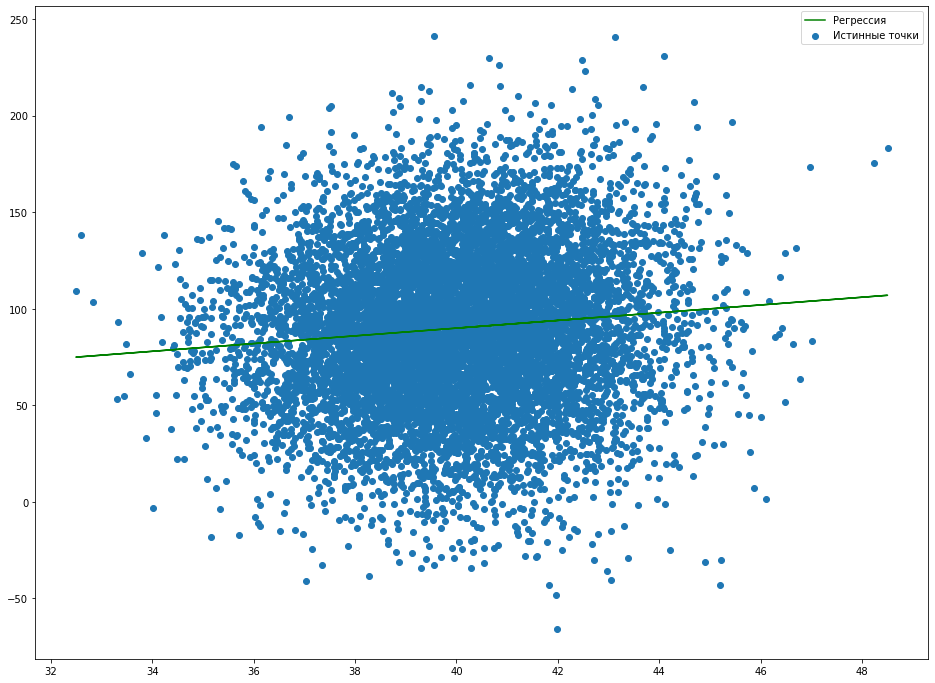

In [83]:
x = np.random.normal(loc=40.0, scale=2.0, size=10000)
eps = np.random.normal(loc=0.0, scale=x, size=10000)
y = 10+2*x+eps

plt.figure(figsize=(16, 12))
plt.scatter(x, y, label='Истинные точки')
plt.plot(x, y-eps, c='g', label='Регрессия')
plt.legend()
plt.show()

In [84]:
data = pd.DataFrame(np.vstack([x, y]).T, columns=['x', 'y'])
model = smf.ols(data=data, formula='y ~ x').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     94.90
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           2.52e-22
Time:                        14:48:40   Log-Likelihood:                -51090.
No. Observations:               10000   AIC:                         1.022e+05
Df Residuals:                    9998   BIC:                         1.022e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5888      8.045      1.316      0.188      -5.182      26.359
x              1.9580      0.201      9.742      0.000       1.564       2.352
==============================================================================
Omnibus:                        1.620   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                1.602
Skew:                          -0.014   Prob(JB):                        0.449
Kurtosis:                       3.055   Cond. No.                         805.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Видим, что теперь коэффициент при независимой переменной является значимым на любом уровне значимости, как и сама модель в целом. Проведём тест на гетероскедастичность:

In [85]:
sms.het_breuschpagan(model.resid, model.model.exog)

(44.73485724411641,
 2.256049931692788e-11,
 44.92689007405649,
 2.155632636293281e-11)

Тест Бреуша-Пагана на гетероскедастичность отвергает гипотезу об отсутствии гетероскедастичности в остатках на любом разумном уровне значимости

Взвесим переменные на Х:

In [86]:
y_weighted = y/x
const_weighted = 1/x
x_weighted = x/x
data = pd.DataFrame(np.vstack([const_weighted, y_weighted]).T, columns=['const_weighted', 'y_weighted'])
data.head()

,const_weighted,y_weighted
0,0.024920,1.034508
1,0.024411,2.478683
2,0.025997,1.722970
3,0.024675,1.876698
4,0.023998,0.431399


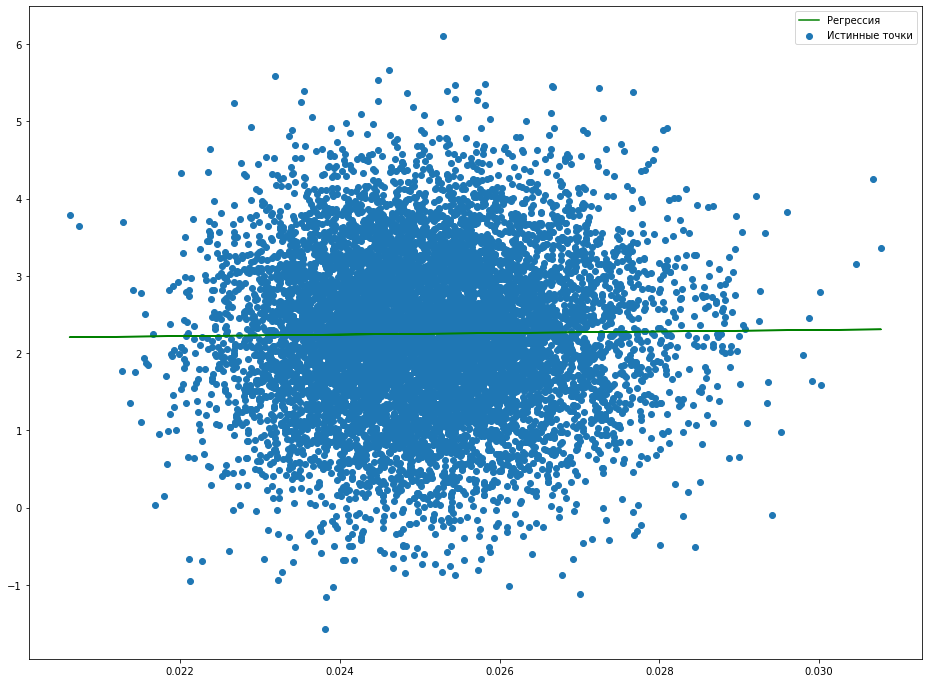

In [89]:
plt.figure(figsize=(16, 12))
plt.scatter(const_weighted, y_weighted, label='Истинные точки')
plt.plot(const_weighted, y_weighted-eps/x, c='g', label='Регрессия')
plt.legend()
plt.show()

Визуально при взвешивании наблюдений изменился лишь угол наклона для независимой переменной, ну и в конце выборки значения стали чуть ближе к линии

In [87]:
model2 = smf.wls(data=data, formula='y_weighted ~ const_weighted').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:             y_weighted   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.007
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.157
Time:                        14:51:25   Log-Likelihood:                -14196.
No. Observations:               10000   AIC:                         2.840e+04
Df Residuals:                    9998   BIC:                         2.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9414      0.199      9.733      0.000       1.550       2.332
const_weighted    11.2527      7.944      1.417      0.157      -4.319      26.824
==============================================================================
Omnibus:                        0.314   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.284
Skew:                          -0.007   Prob(JB):                        0.868
Kurtosis:                       3.022   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
model2.HC0_se

Intercept         0.199449
const_weighted    7.945000
dtype: float64

По итогам выполнения данного пункта можно сделать вывод о том, что для выборки большего размера гетероскедастичность в остатках лучше идентифицируема, при этом стандартные ошибки оценок коэффициентов, устойчивых к гетероскедастичности, почти не отличаются от исходных стандартных ошибок модели. Это означает, что при увеличении выборки корректировка на гетероскедастичность через взвешивание наблюдений обладает бОльшим смыслом. Для проверки данного тезиса выведем статистику теста Бреуша-Пагана для взвешенной модели:

In [90]:
sms.het_breuschpagan(model2.resid, model2.model.exog)

(0.07327530579304131,
 0.7866263007403923,
 0.07326118755585145,
 0.786651947569768)

Действительно, гетероскедастичности больше нет, модель обладает статистически эффективными оценками (хоть при этом и её качество стало околонулевым)

**Пункт 4.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какого-нибудь метода бутстрэпа. Сравните результаты оценки с результатами предыдущего пункта.

Не будем мудрствовать лукаво и возьмём код с семинара для Pairs Bootstap:

In [91]:
from statsmodels.api import OLS
n_reps = 100
coef_matr = np.zeros((n_reps, 2))

for i in range(n_reps):
    # 1. Строим бутстрэп-выборку
    random_inds = np.random.randint(0, len(model.model.endog), size = len(model.model.endog))
    y_b = model.model.endog[random_inds]
    X_b = model.model.exog[random_inds, :]
    
    # 2. Оцениваем модель и сохраняем оценки
    model_b = OLS(y_b, X_b).fit()
    coefs = np.array(model_b.params).reshape(1, -1)
    coef_matr[i, :] = coefs
    
# Центрируем оценку каждого коэффициента
coef_matr = coef_matr - np.mean(coef_matr, axis = 0)

# Собираем ковариационную матрицу
cov_matr = 0
for i in range(n_reps):
    cov_matr += coef_matr[i, :].reshape(-1, 1) @ coef_matr[i, :].reshape(-1, 1).T

Выведем полученную ковариационную матрицу для коэффициентов регрессионной модели:

In [92]:
pd.DataFrame(cov_matr / (n_reps - 1), columns = model.model.exog_names, index = model.model.exog_names)

,Intercept,x
Intercept,71.976311,-1.811047
x,-1.811047,0.045650


Вспомним, какая ковариационная матрица получилась в рамках предыдущего пункта:

In [99]:
model2.cov_params()

,Intercept,const_weighted
Intercept,0.039784,-1.582482
const_weighted,-1.582482,63.105017


Вспоминаем, что для моей реализации WLS необходимо поменять местами элементы ковариационной матрицы на главной диагонали и можем сделать вывод, что бутстрапирование выборки даёт менее состоятельные оценки ковариационной матрицы по сравнению с методом WLS.

Для интереса сравним с исходной оценкой стандартных ошибок для регрессионной модели:

In [96]:
model.cov_params()

,Intercept,x
Intercept,64.727451,-1.615101
x,-1.615101,0.040401


Видим, что в рамках WLS у нас получаются наиболее маленькие значения элементов в рамках всей ковариационной матрицы, можем заключить об эмперически проверенной эффективности оценивания через метод WLS

**Пункт 5.** Оцените стандартные ошибки коэффициентов, устойчивые к гетероскедастичности, при помощи какой-нибудь из схем HC. Поменялось ли что-нибудь?

Воспользуемся способом, изученным на семинаре: исправим только доверительные инетрвалы для параметров модели, оцениваемой при помощи МНК,так, чтобы они были устойчивы к гетероскедастичности. Тогда

$$
\hat{\mathrm{Var}}(\hat{\beta}_{OLS})_{HC} = (X'X)^{-1}X'\hat{\mathrm{Var}}(u)_{HC}X(X'X)^{-1}.
$$

В качестве $\hat{\mathrm{Var}}(u)_{HC_0}$ возьмём диагональную матрицу от квадратов оценённых остатков исходной модели - $\mathrm{diag}(\hat{u}^2_1, \ldots, \hat{u}^2_n)$

In [106]:
var_u = np.diag(np.power(model.resid, 2))
var_u.shape

(10000, 10000)

In [110]:
exog = model.model.exog
Var_HC = np.linalg.inv(exog.T @ exog) @ exog.T @ var_u @ exog @ np.linalg.inv(exog.T @ exog)
df_var_hc = pd.DataFrame(Var_HC, columns = model.model.exog_names, index = model.model.exog_names)
df_var_hc

,Intercept,x
Intercept,64.674466,-1.621493
x,-1.621493,0.040754


In [109]:
model.cov_params()

,Intercept,x
Intercept,64.727451,-1.615101
x,-1.615101,0.040401


Видим, что стандартная ошибка коэффициента для коснтанты уменьшилась примерно на 0.05 по сравнению с исходной моделью, тогда как все остальные коэффициенты незначительно увеличились, покажем изменения наглядно:

In [111]:
df_var_hc / model.cov_params()

,Intercept,x
Intercept,0.999181,1.003958
x,1.003958,1.008735


Можем заметить, что случившиеся изменения крайне незначительны, при этом нельзя уверенно сказать, что коррекция исходных оценок на гетероскедастичность дала положительный результат, поскольку для Х и ковариации оценок коэффициентов значения только увеличились, а это очень-очень плохо :(

**Пункт 6.** Сделайте итоговый вывод о значимости коэффициентов в модели. Очевиден ли он?

Посмотрим на p-значения t-статистик для коэффициентов

In [115]:
model.pvalues.astype(np.float16)

Intercept    0.18811
x            0.00000
dtype: float16

In [116]:
model2.pvalues.astype(np.float16)

Intercept         0.000000
const_weighted    0.156616
dtype: float16

Видим, что для исходного и взвешенного Х в МНК и ДВМНК моделях гипотеза о незначимости коэффициента при независимой переменной отвергается на любом разумном уровне значимости. Это говорит о том, что Х оказывает существенное влияние на У, которое получилось идентифицировать в рамках моделирования регрессии. Однако на графиках выше для выборки размером 10000 наблюдений это не совсем очевидно, поскольку угол наклона линии регрессии находится на уровне нуля.

В свою очередь, для исходной и взвешенной константы в МНК и ДВМНК гипотеза о незначимости коэффициента при константе не отвергается на уровне значимости как минимум 15%. Это означает, что точка пересечения линии регрессии с осью ОУ может лежать как выше оси ОХ, так и ниже её, то есть усреднённый результат зависимой переменной варьируется достаточно сильно, чтобы уверенно распознать значимое отличие от 0. Ну что ж, бывает, при этом с учётом столь большого значения ошибок модели это достаточно очевидный результат

## Safe Area

Если хотите, напишите здесь что угодно.

Желаю Саше Плахину успешного закрытия сессии, особенно желаю  10 по слупам. Если меня проверяет не Саша, то желаю счастливой предновогодней поры проверяющему, чтобы рождественский дух пришёл в ваш дом и у вас получилось бы немножко расслабиться после столь тяжёлого и напряжённого года